<a href="https://colab.research.google.com/github/InsightByHarshit/IMDB-Data-Analysis/blob/main/IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

data = pd.read_csv('IMDB.csv')


The **info()** method in a pandas DataFrame provides a concise summary of the DataFrame's structure. It is particularly useful for quickly understanding the data's size, data types, and missing values.

In [2]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
 12  Unnamed: 12         0 non-null      float64
 13  Unnamed: 13         0 non-null      float64
 14  Unnamed: 14         0 non-null      float64
 15  Unnamed: 15         0 non-null      float64
 16  Unnamed

**Removing Unwanted Column**.

In [3]:
data = data.dropna(axis=1, how='all')
data = data.drop('Unnamed: 19', axis=1)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In pandas, the **dtypes** attribute of a DataFrame shows the data types of each column. These data types are critical because they determine how operations are performed on the data in that column.

In [5]:
print("Data types of each column:\n", data.dtypes)


Data types of each column:
 Rank                    int64
Title                  object
Genre                  object
Description            object
Director               object
Actors                 object
Year                    int64
Runtime (Minutes)       int64
Rating                float64
Votes                   int64
Revenue (Millions)    float64
Metascore             float64
dtype: object


**isnull().sum()** is a concise way to check for missing (null) values in a pandas DataFrame or Series.

In [6]:
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64


**Handle missing values**

In [7]:
# Fill missing 'Revenue (Millions)' and 'Metascore' with their respective means
data['Revenue (Millions)'] = data['Revenue (Millions)'].fillna(data['Revenue (Millions)'].mean())
data['Metascore'] = data['Metascore'].fillna(data['Metascore'].mean())

# Verify no missing values remain
updated_missing_values = data.isnull().sum()
print("Updated missing values in each column:\n", updated_missing_values)

Updated missing values in each column:
 Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
dtype: int64


When working with a pandas DataFrame, **columns** refer to the vertical structures that hold data for a specific feature or attribute. Each column has a name (or label) and contains data of a specific type.

In [8]:
print(data.columns)

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')


The **.describe()** method in pandas is used to compute summary statistics for numerical columns in your dataset

In [9]:
print(data.describe())

              Rank         Year  Runtime (Minutes)       Rating         Votes  \
count  1000.000000  1000.000000        1000.000000  1000.000000  1.000000e+03   
mean    500.500000  2012.783000         113.172000     6.723200  1.698083e+05   
std     288.819436     3.205962          18.810908     0.945429  1.887626e+05   
min       1.000000  2006.000000          66.000000     1.900000  6.100000e+01   
25%     250.750000  2010.000000         100.000000     6.200000  3.630900e+04   
50%     500.500000  2014.000000         111.000000     6.800000  1.107990e+05   
75%     750.250000  2016.000000         123.000000     7.400000  2.399098e+05   
max    1000.000000  2016.000000         191.000000     9.000000  1.791916e+06   

       Revenue (Millions)    Metascore  
count         1000.000000  1000.000000  
mean            82.956376    58.985043  
std             96.412043    16.634858  
min              0.000000    11.000000  
25%             17.442500    47.750000  
50%             60.37500

1. **Univariate Analysis**
Focuses on analyzing a single variable's distribution and characteristics.

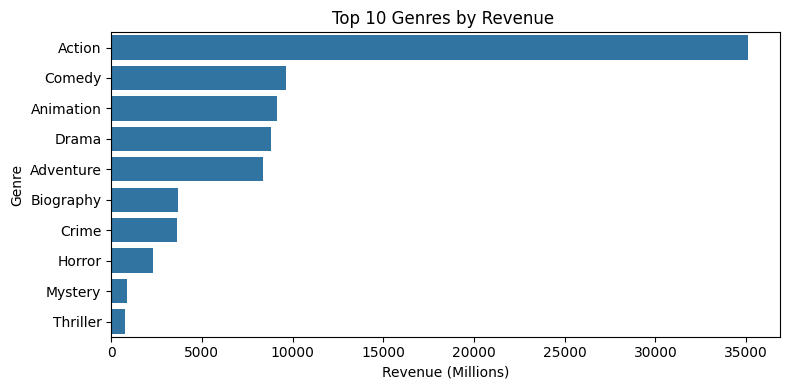

In [10]:
# Group data by genre and calculate total revenue for each genre
genre_revenue = data.groupby('Genre')['Revenue (Millions)'].sum().reset_index()

# Sort genres by revenue in descending order and select the top 10
top_10_genres = genre_revenue.sort_values(by='Revenue (Millions)', ascending=False).head(10)

# Create the horizontal bar plot using seaborn
plt.figure(figsize=(8, 4))
sns.barplot(data=top_10_genres, x='Revenue (Millions)', y='Genre')
plt.title('Top 10 Genres by Revenue ')
plt.xlabel('Revenue (Millions)')  # Update x-axis label
plt.ylabel('Genre')  # Update y-axis label
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


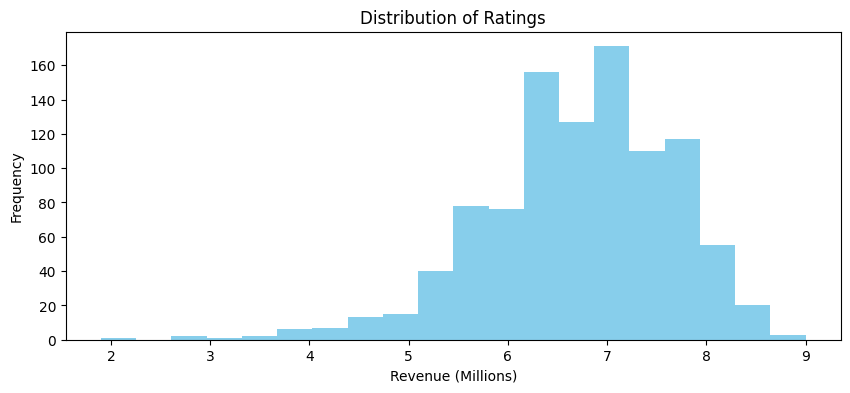

In [11]:
# Univariate Analysis - Histogram for numerical data

plt.figure(figsize=(10, 4))
data['Rating'].plot(kind='hist', bins=20, title='Distribution of Ratings', color='skyblue')
plt.xlabel('Revenue (Millions)')
plt.ylabel('Frequency')
plt.show()


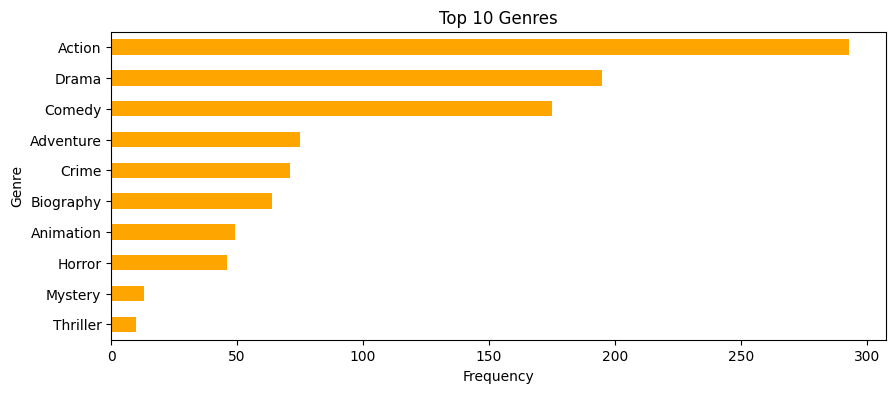

In [12]:
# Bar plot for categorical data

plt.figure(figsize=(10, 4))
data['Genre'].value_counts().head(10).sort_values(ascending=True).plot(kind='barh', title='Top 10 Genres', color='orange')
plt.xlabel('Frequency') # Swap x and y labels
plt.ylabel('Genre') # Swap x and y labels
plt.show()

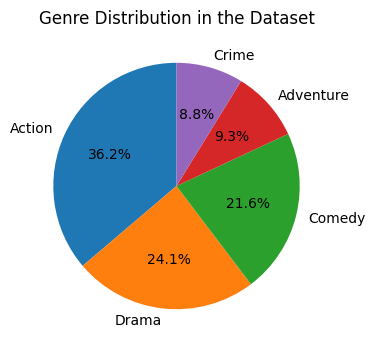

In [13]:
genre_counts = data['Genre'].value_counts().head()

# Create the pie chart
plt.figure(figsize=(4, 4))  # Adjust figure size as needed
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Genre Distribution in the Dataset')
plt.show()

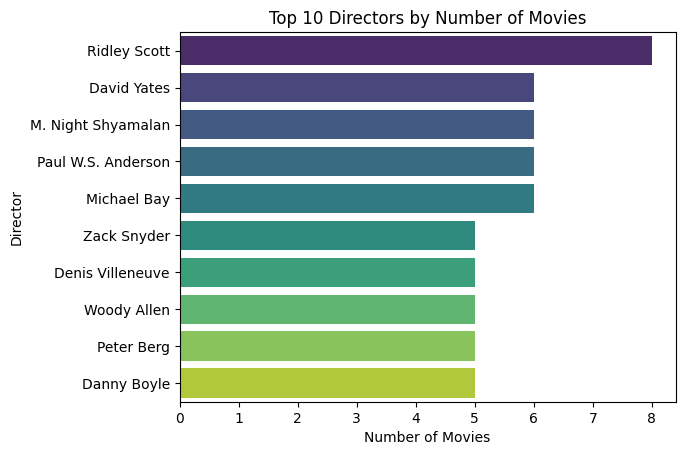

In [14]:
top_directors = data['Director'].value_counts().head(10)

# Assign 'y' to 'hue' and set legend to False
sns.barplot(x=top_directors.values, y=top_directors.index, hue=top_directors.index, palette='viridis')
plt.title('Top 10 Directors by Number of Movies')
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.show()

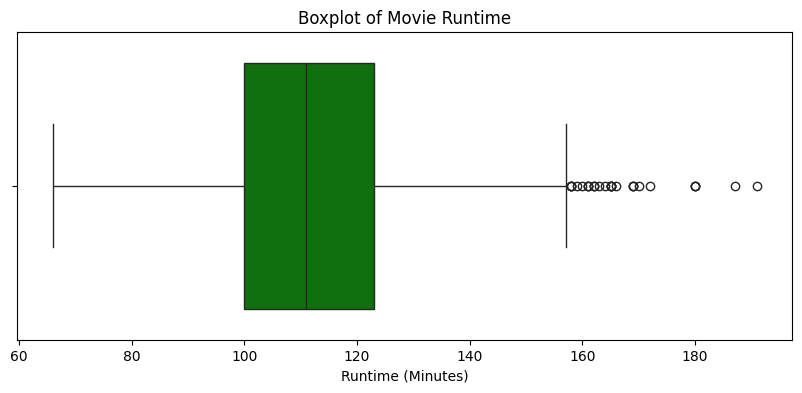

In [15]:
# Boxplot for Runtime
plt.figure(figsize=(10, 4))
sns.boxplot(x=data['Runtime (Minutes)'], color='green')
plt.title('Boxplot of Movie Runtime')
plt.show()

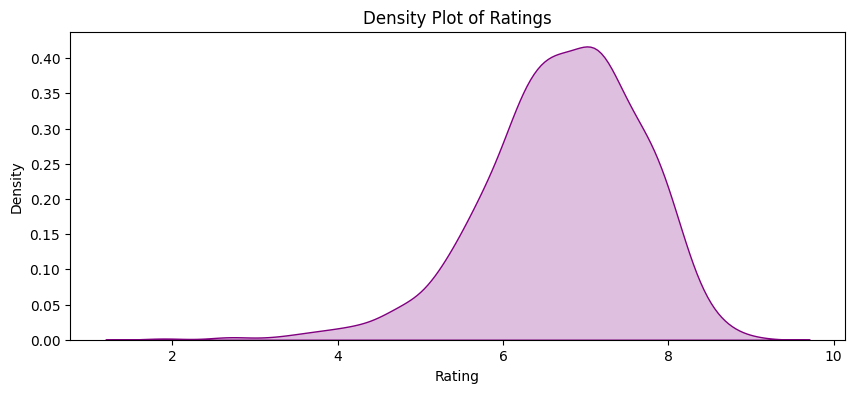

In [16]:
# KDE Plot for Rating Distribution
plt.figure(figsize=(10, 4))
sns.kdeplot(data['Rating'], fill=True, color='purple')
plt.title('Density Plot of Ratings')
plt.show()

Bivariate Analysis

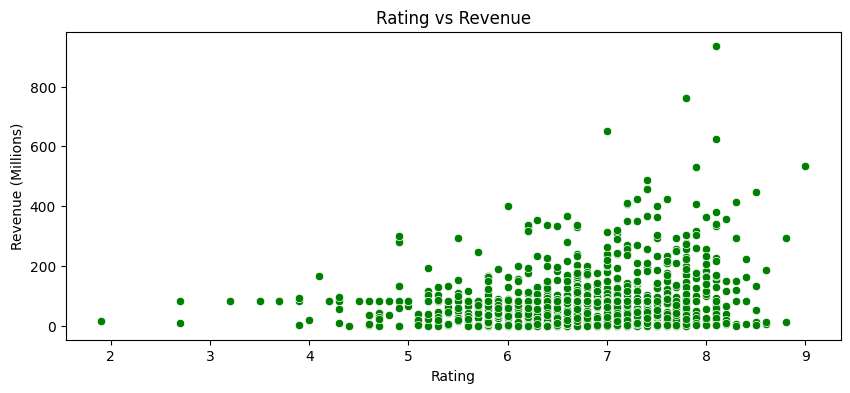

In [17]:
# Scatter plot: Rating vs Revenue
plt.figure(figsize=(10, 4))
sns.scatterplot(x='Rating', y='Revenue (Millions)', data=data, color='green')
plt.title('Rating vs Revenue')
plt.show()

**METASCORE** = Score given by *Critics*.

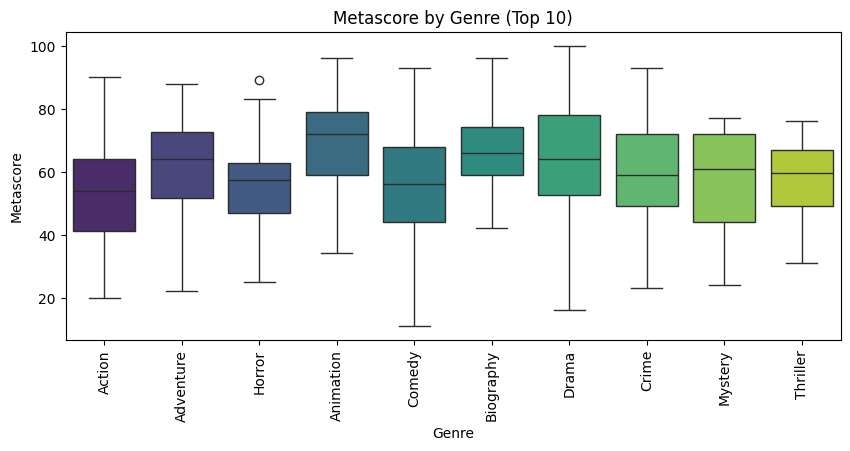

In [18]:
# Select the top 10 most frequent genres
top_genres = data['Genre'].value_counts().nlargest(10).index

# Filter the data to include only the top genres
filtered_data = data[data['Genre'].isin(top_genres)]

# Create the boxplot with the filtered data
plt.figure(figsize=(10, 4))
sns.boxplot(x='Genre', y='Metascore', data=filtered_data, palette='viridis',hue='Genre')

plt.title('Metascore by Genre (Top 10)')
plt.xticks(rotation=90)
plt.show()

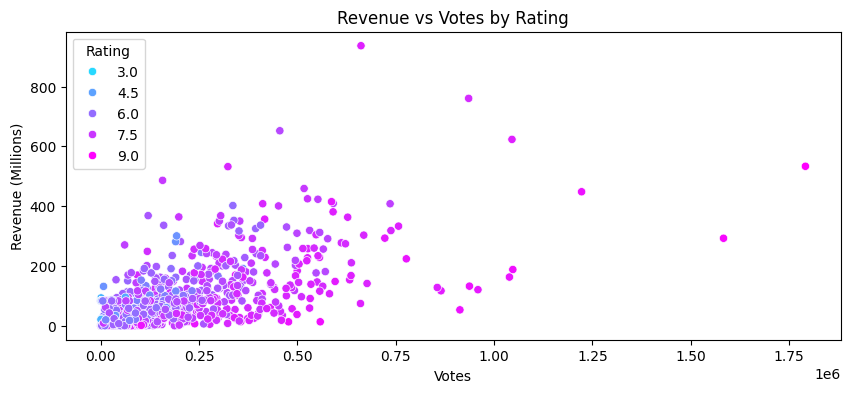

In [19]:
# Scatter Plot: Revenue vs Votes
plt.figure(figsize=(10, 4))
sns.scatterplot(x='Votes', y='Revenue (Millions)', data=data, hue='Rating', palette='cool')
plt.title('Revenue vs Votes by Rating')
plt.show()

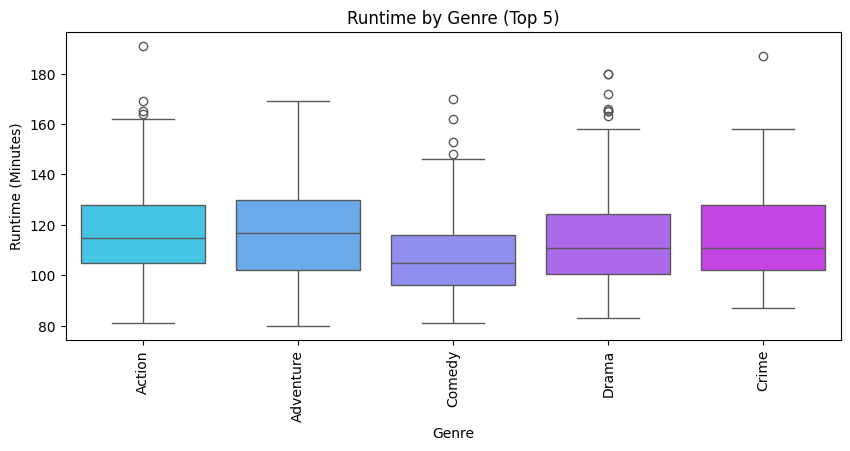

In [20]:
# Box Plot: Runtime by Genre (for top 5 genres)
top_genres = data['Genre'].value_counts().head(5).index
filtered_data = data[data['Genre'].isin(top_genres)]

plt.figure(figsize=(10, 4))
sns.boxplot(x='Genre', y='Runtime (Minutes)', data=filtered_data, palette='cool',hue='Genre')
plt.title('Runtime by Genre (Top 5)')
plt.xticks(rotation=90)
plt.show()

Text(0, 0.5, 'Average Rating')

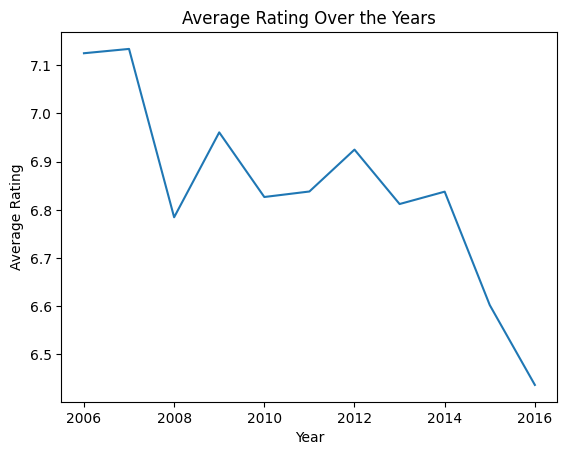

In [21]:
# Line Plot: Average Rating Over Years

avg_rating_by_year = data.groupby('Year')['Rating'].mean()
sns.lineplot(x=avg_rating_by_year.index, y=avg_rating_by_year.values)
plt.title('Average Rating Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')

Multivariate

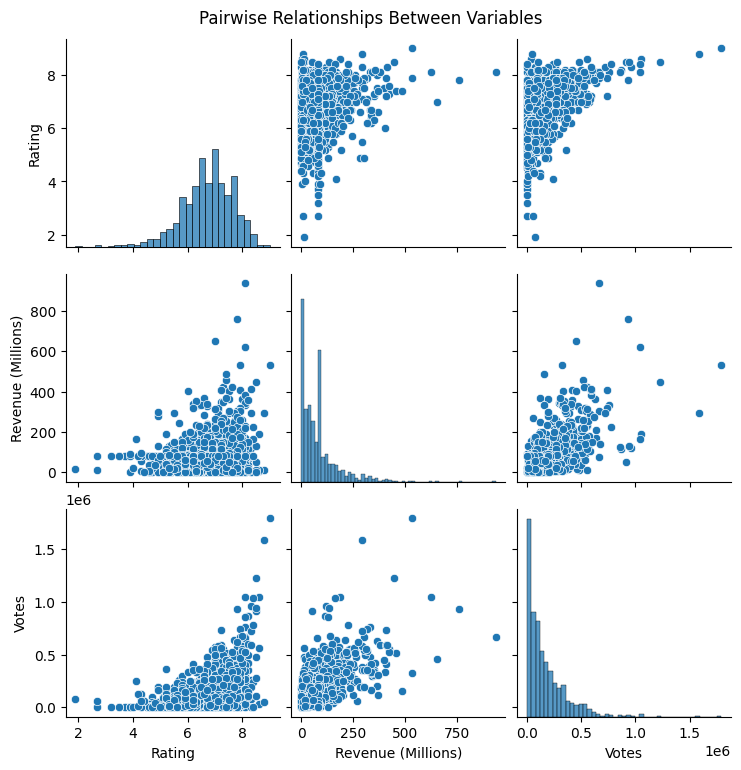

In [22]:
# Multivariate Analysis - Pairplot

sns.pairplot(data[['Rating', 'Revenue (Millions)', 'Votes']])
plt.suptitle('Pairwise Relationships Between Variables', y=1.02)
plt.show()

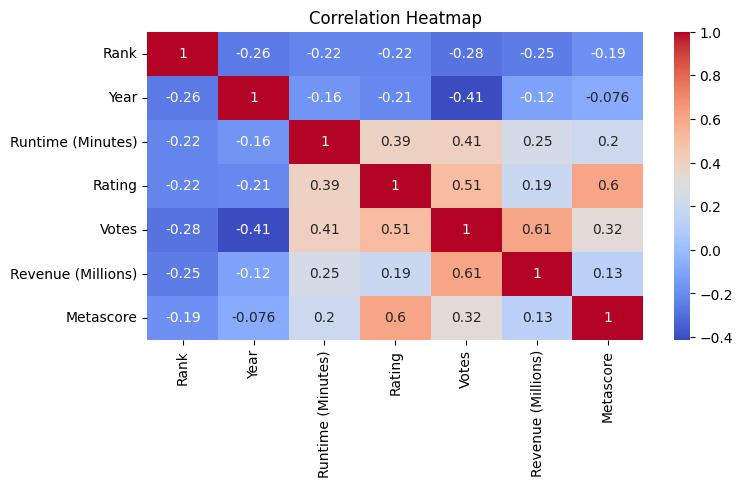

In [28]:
# Heatmap: Correlation between numerical variables
plt.figure(figsize=(8, 4))
# Select only numerical features for correlation
numerical_data = data.select_dtypes(include=np.number)
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**INSIGHTS**

***Popular Genres:***

Drama dominates the dataset, followed by Action and Comedy. These genres might have a broader audience or higher production rates.

***Rating Distribution:***

The average IMDb rating is ~6.72, with most movies falling between 6.0 and 7.5. Few movies score above 8.5, highlighting the rarity of universally acclaimed films.

***Runtime Trends:***

Most movies have runtimes around 110 minutes, but some outliers are significantly longer (~190 minutes).

***Revenue:***

Revenue is highly skewed, with a few blockbuster movies earning significantly higher than the average.